## Avato

# [Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction/overview)

_**Machine Learning combined with sensitivity analysis to develop and optimize marketing business strategies**_

---

---

## Project Overview
---
In online advertising, click-through rate (CTR) is a very important metric for evaluating ad performance. As a result, click prediction systems are essential and widely used for sponsored search and real-time bidding. Machine learning is routinely used to help make business decisions yet most often, ML is only used to make predictions while business decisions require some judgement and intuition from experts.


## Data
---
For this competition, Avazu have provided 11 days worth of data to build and test prediction models. The train data covers 10 days of click streams data from 2014–10–21 to 2014–10–30, that is 240 hours and 1 day of ads for testing model predictions.

### Files
- train - Training set. 10 days of click-through data, ordered chronologically. Non-clicks and clicks are subsampled according to different strategies.
- test - Test set. 1 day of ads to for testing your model predictions. 
- sampleSubmission.csv - Sample submission file in the correct format, corresponds to the All-0.5 Benchmark.

### Characteristics

- id: ad identifier
- click: 0/1 for non-click/click
- hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
- C1 -- anonymized categorical variable
- banner_pos
- site_id
- site_domain
- site_category
- app_id
- app_domain
- app_category
- device_id
- device_ip
- device_model
- device_type
- device_conn_type
- C14-C21


__Target feature__: click

__Site features__: site_id, site_domain, site_category

__App features__: app_id, app_domain, app_category

__Device feature__: device_id, device_ip, device_model, device_type, device_conn_type

__Anonymized categorical features__: C14-C21



## Evaluation
---
Click-through rate is a number, but we need to determine if the user is going to click or not so we will be predicting using classification models. Our evaluation metric will be logarithmic loss to determine how accurate the final model is. Log loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of the machine learning model is to minimize this value (error). Log loss takes into account the uncertainty of the prediction based on how much it varies from the actual label as it penalizes both types of errors especially those that are confident and wrong.

#### Calculating log loss from scratch
    def logloss(true_label, predicted, eps=1e-15):
      p = np.clip(predicted, eps, 1 - eps)
      if true_label == 1:
        return -log(p)
      else:
        return -log(1 - p)
        
#### Sklearn
    from sklearn.metrics import log_loss
    log_loss(y_true, y_pred, eps=1e-15)

#### Keras (Deep Learning)
    model.compile(loss='categorical_cross_entropy', optimizer='sgd')

## Modeling
---

### Benchmark Model
TODO

### Best Model
TODO


## Application
---
Apply machine learning models and analysis to design business strategy.


## Overall Methodology
----------
I like to add this framework here so I can always go back to it and check if I need to work on a certain step or want to add more to it. I don't necessarily need to do every step.


1. Framing the problem
    - What are we trying to solve?
    - Understand what's the problem here and ask questions
    - What type of problem are we trying to solve?
        - Classification, regression, etc.
        - Types of algorithms specified for possible use         
2. Collecting relevant information and data
    - What type of data do we have?
    - Can we use any complimentary data with that is public that will help our with our analysis/modeling?
    - What other data requirements are there?
    - What is considered a success for this problem?
    - What libraries do we need?
        - How do we know if our models are good?
3. Process for analysis (preprocessing & cleaning)
    - How does the data structure and distribution look like?
    - Is the data usable right away?
    - Can the data be plotted?
    - What changes do we need in order to make the data usable if it's not already?
    - This step is not really an isolated step as it can encompass exploratory, feature engineering + more
4. Exploratory data analysis
    - How does the data look like?
    - Are there any patterns?
        - Identify any summary statistics, plotting, counting, etc.
    - Familiarize yourself with the data
    - Basically the step to help you get to know the data better
5. Feature engineering (applied machine learning)
    - Can we create more data (features) that will be helpful for our models?
    - "... re-working of predictors is more of an art, requiring the right tools and experience to find better predictor representations" - Max Kuhn
6. Statistical analysis
    - Univariate, bivariate, multivariate analysis
        - Analysis of a single feature
        - Analysis of two features and their relationships
        - Analysis of data collected on more than one dependent variable and their relationships (PCA, PLS)
7. Model development & scoring
    - Splitting the data into train and test sets
        - Always make sure you have a completely separate data to test your final model on after hyperparameter tuning and training has been done
        - Think about your experimental design beforehand so that you minimize unrelated sources of variation and reduce as much data leakage (if any) as possible
    - Normalizing the data to be on similar scales
        - Normalization, standardization methods (Z-score, minmax, median)
    - Create baseline, pre-tuned, and tuned models (includes cross-validation)
        - Create easy to more complex models if needed (think about computational cost, complexity, explainability)
    - Hyperparameter tuning
    - Fit cross-validated tuned models using best hyperparameters
    - Score model and get results
8. Evaluation
    - How accurate are the models?
        - Are the models overfitting or underfitting?
    - What evaluation metric are we using?
    - Which features are important?
    - Iterate steps if we are proceeding with specific features selected
        - Dimensionality reduction methods (PCA, LDA) to see if we can reduce model complexity (this step can be before modeling as well)
    - Is the final model good enough in terms of these questions:
        - Accuracy: How many does it get right?
        - Speed: How fast does it take for the model to deploy?
        - Scalability: Can the model handle large datasets?
        - Robustness: How well does the model handle outliers/missing values?
        - Interpretability: Is the model easy to understand?
9. Results
    - What's our conclusion?
    - What actions are we going to take?
10. Ending notes
    - Extra information that we may not go over like steps that we did not go into or missed
        - Any other possible methods/solutions that we could look at in the future

---
---

### Import libraries
---

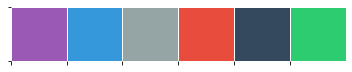

In [1]:
# Toolbox 101
from datetime import datetime, timedelta, date
from tqdm import tqdm
import pickle
import gc
import os
import gzip
import pandas as pd
import pandas_profiling
import numpy as np
import random as rand
import datetime as dt
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import plotly.plotly as py
import plotly.graph_objs as go # graph_objects in version 4 (currently have plotly v3 installed)
import plotly.offline as pyoff
import plotly.figure_factory as ff

# Stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats import power

# Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from catboost import CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier, plot_importance, plot_tree
import lightgbm as lgb

# Evaluation
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Ignore useless warnings
import warnings
warnings.filterwarnings(action='ignore')

# Preset data display
pd.options.display.max_seq_items = 5000
pd.options.display.max_rows = 5000

# Set palette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette(flatui))
# 34495e

seed = 100

### Helpers
---

In [2]:
def pct_bar_labels():
    '''
    Function used to label the relative frequency on top of each bars
    '''
    # Set font size
    fs=15
    
    # Set plot label and ticks
    plt.ylabel('Relative Frequency (%)', fontsize=fs)
    plt.xticks(rotation=0, fontsize=fs)
    plt.yticks([])
    
    # Set individual bar labels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha='center', va='center', xytext=(0, 7), 
        textcoords='offset points', fontsize=fs, color='black')

def freq_table(var):
    '''
    Define plot global variables
    Create a function that will populate a frequency table (%)
    Get counts per feature then get the percentage over the total counts
    '''
    global ax, ax1
    
    # Get Values and pct and combine it into a dataframe
    count_freq = var.value_counts()
    pct_freq = round(var.value_counts(normalize=True)*100, 2)
    
    # Create a dataframe
    df = pd.DataFrame({'Count': count_freq, 'Percentage': pct_freq})
    
    # Print variable name
    print('Frequency of', var.name, ':')
    display(df)
    
    # Create plot
    ax1 = pct_freq.plot.bar(title='Percentage of {}'.format(var.name), figsize=(12,8))
    ax1.title.set_size(15)
    pct_bar_labels()
    plt.show()
    
# Define a null function
def get_nulls(df):
    
    # Get null pct and counts
    null_cols = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Null Data Count'])
    null_cols_pct = pd.DataFrame(round(df.isnull().sum().sort_values(ascending=False)/len(df),2), columns=['Null Data Pct'])

    # Combine dataframes horizontally
    null_cols_df = pd.DataFrame(pd.concat([null_cols, null_cols_pct], axis=1))

    all_nulls = null_cols_df[null_cols_df['Null Data Pct']>0]

    # Print
    print('There are', len(all_nulls), 'columns with missing values.')
    return all_nulls

# Define plot_nulls function
def plot_nulls(train):
    # Get null pct and counts
    null_cols = pd.DataFrame(train.isnull().sum().sort_values(ascending=False), columns=['Null Data Count'])
    null_cols_pct = pd.DataFrame(round(train.isnull().sum().sort_values(ascending=False)/len(train),2)*100, columns=['Null Data %'])

    # Combine horizontally (axis=1) into a dataframe with column names (keys=[]) then to a data frame
    null_cols_df = pd.DataFrame(pd.concat([null_cols, null_cols_pct], axis=1))

    all_nulls = null_cols_df[null_cols_df['Null Data %']>0]

    # Create figure space
    if len(all_nulls) > 8:
        plt.figure(figsize=(12, 8))
    elif len(all_nulls) > 5:
        plt.figure(figsize=(6, 8))
    else:
        plt.figure(figsize=(4, 8))

    # Create plot
    sns.barplot(x=all_nulls.index,
                y='Null Data %',
                data=all_nulls)

    # Set plot features
    plt.ylim(0, 100)
    plt.xticks(rotation='90')
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of Missing Values', fontsize=15)
    plt.title('Percent of Missing Data by Features', fontsize=15)
    plt.show()
    
# Create a new function to capture feature importance for models
def feature_importance(model):
    
    importance = pd.DataFrame({'Feature': headers,
                               'Importance': np.round(model.feature_importances_,3)})
    
    importance = importance.sort_values(by = 'Importance', ascending = False).set_index('Feature')
    
    return importance

# Reduce data size
def reduce_mem_usage(df):
    ''' 
    Iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.        
    '''
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    # Loop through every column in the dataframe
    for col in df.columns:
        col_type = df[col].dtype
        
        # Objects
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            
            # Numbers
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

## Load data
---

In [3]:
os.listdir('LargeData')

['18-online-retail.csv',
 '19-credit-card-defaults.csv',
 '28-test.csv',
 '28-train.csv',
 '29-data.csv',
 '37-ctr-train.gz']

### Sample data
Take a fraction of the data to explore versus the entire dataset for speed purposes.

Method 1: Load the data to the specified amount of rows

Method 2: Load the data and then take a fraction of the dataset.

In [4]:
# Set number to sample
n = 40428967
sample_size = 500000
skip_values = sorted(rand.sample(range(1, n), n-sample_size))

print('Total Entries:', n)
print('Sample Size:', sample_size)

Total Entries: 40428967
Sample Size: 500000


In [5]:
# Parse date
parse_date = lambda x: pd.datetime.strptime(x, '%y%m%d%H')

In [6]:
# Set data types
types_train = {
    'id': np.dtype(int),
    'click': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21': np.dtype(int)
}

types_test = {
    'id': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21': np.dtype(int)
}

In [7]:
# Load dataset (Method 1)
with gzip.open('LargeData/37-ctr-train.gz') as f:
    train = pd.read_csv(f, parse_dates=['hour'], date_parser=parse_date, dtype=types_train, skiprows=skip_values)

In [8]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1315039248,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,-1,79
1,554336934,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,100084,79
2,-1012311944,0,2014-10-21,1005,1,43d6df75,27e3c518,28905ebd,ecad2386,7801e8d9,...,1,0,15703,320,50,1722,0,35,-1,79
3,18267922,0,2014-10-21,1010,1,85f751fd,c4e18dd6,50e219e0,b7f64446,7801e8d9,...,4,0,20366,320,50,2333,0,39,-1,157
4,1979575667,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,100084,79


In [9]:
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')

Train dataset has 500000 rows and 24 columns.


In [10]:
train.describe()

,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.253014e+06,0.169916,1004.968682,0.289026,1.015820,0.332494,18833.605760,318.885904,60.083644,2111.605422,1.432658,227.771620,53274.143700,83.337762
std,1.239164e+09,0.375559,1.094574,0.510931,0.528252,0.855097,4962.599379,21.133593,47.347226,609.853455,1.327262,351.149598,49953.188248,70.283293
min,-2.147482e+09,0.000000,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,-1.070630e+09,0.000000,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000
50%,8.735530e+05,0.000000,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000
75%,1.073984e+09,0.000000,1005.000000,1.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,175.000000,100094.000000,101.000000
max,2.147483e+09,1.000000,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 24 columns):
id                  500000 non-null int32
click               500000 non-null int32
hour                500000 non-null datetime64[ns]
C1                  500000 non-null int32
banner_pos          500000 non-null int32
site_id             500000 non-null object
site_domain         500000 non-null object
site_category       500000 non-null object
app_id              500000 non-null object
app_domain          500000 non-null object
app_category        500000 non-null object
device_id           500000 non-null object
device_ip           500000 non-null object
device_model        500000 non-null object
device_type         500000 non-null int32
device_conn_type    500000 non-null int32
C14                 500000 non-null int32
C15                 500000 non-null int32
C16                 500000 non-null int32
C17                 500000 non-null int32
C18                 500000 non-

### Target

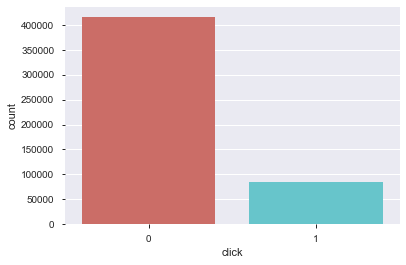

In [12]:
sns.countplot(x='click',
              data=train,
              palette='hls'
            )
plt.show()

Frequency of click :


,Count,Percentage
0,415042,83.01
1,84958,16.99


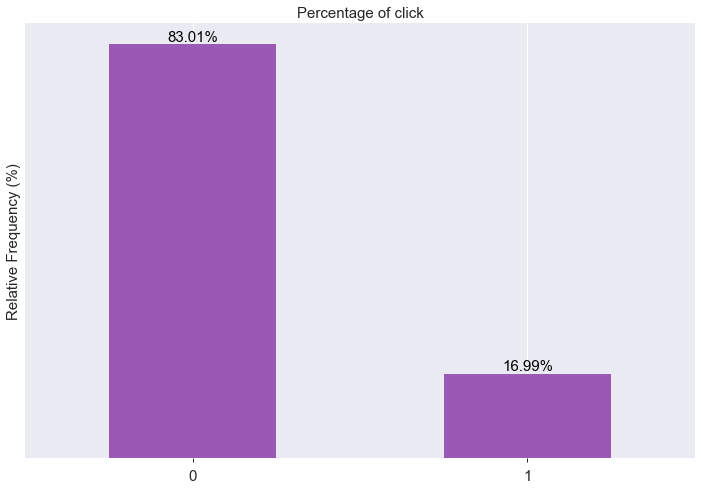

In [13]:
freq_table(train.click) # train.click.value_counts(normalize=True)

### What are popular click hours?

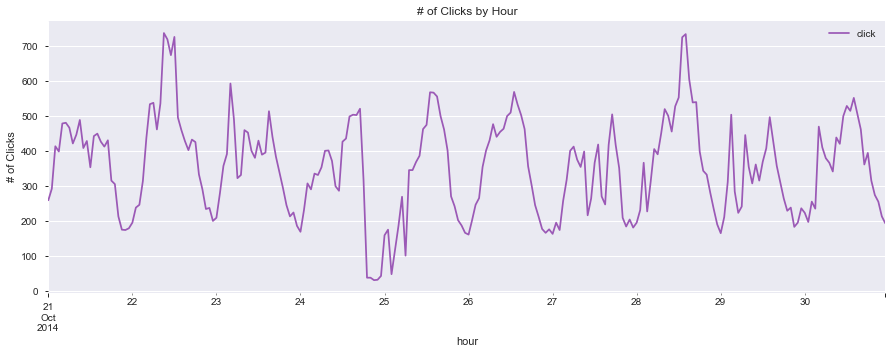

In [14]:
# Group by
train.groupby('hour').agg({'click': 'sum'}).plot(figsize=(15, 5))

# Set plot features
plt.ylabel('# of Clicks')
plt.title('# of Clicks by Hour')
plt.show()

There looks to be a cyclical pattern with peaks and lows during certain hours. From the plot above, the peaks seem to be in the middle of each hour indicating 12PM and with extreme lows around midnight.
- Users are most active around noon
- Users are not active around midnight
    - Are there any Ads being shown during this time?
- If Ads are evenly shown throughout the day, reduce costs by showing them more often during 9AM to 9PM (guessing the timeframe).

### Hour feature

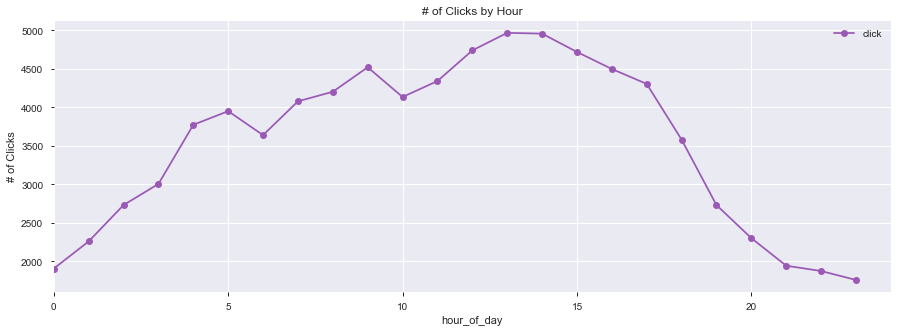

In [15]:
train['hour_of_day'] = train.hour.apply(lambda x: x.hour)
train.groupby('hour_of_day').agg({'click': 'sum'}).plot(figsize=(15, 5), marker='o') # linestyle='--', color='r'

# Set plot features
plt.xlim(0, 24)
plt.ylabel('# of Clicks')
plt.title('# of Clicks by Hour')
# plt.tight_layout()
plt.show()

My initial observations earlier looks to be just about right.The highest number of clicks is at hour 13 and 14 (1PM and 2PM), and the lowest number of clicks is at hour 0 (midnight). This can be a useful feature for rough estimation.

Instead of 9AM through 9PM, change the Ads to show more often between 4AM through 7PM.

### Impressions

In [16]:
train.groupby(['hour_of_day', 'click']).size().unstack()

click,0,1
hour_of_day,,
0,8535,1908
1,10028,2261
2,12514,2733
3,14237,3007
4,20022,3775
5,20549,3952
6,18346,3641
7,18655,4080
8,21506,4204


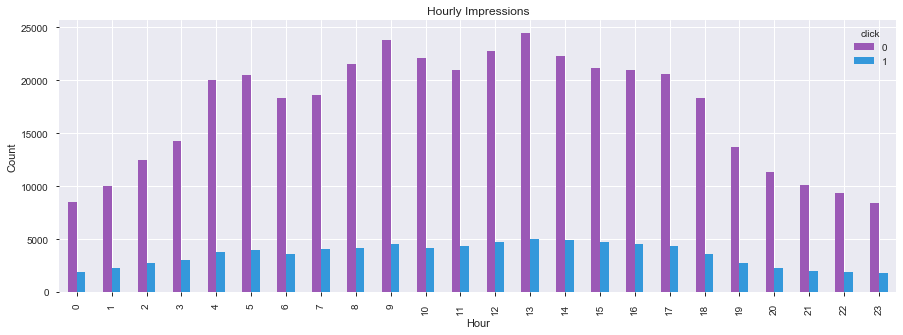

In [17]:
train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', figsize=(15,5))

# Set plot features
plt.title('Hourly Impressions')
plt.ylabel('Count')
plt.xlabel('Hour')
plt.show()

### Click through rate

In [18]:
# Get click data
ctr_df = train[train['click']==1]

# Create new df to store clicks
hour_df = train[['hour_of_day', 'click']].groupby(['hour_of_day']).count().reset_index()
hour_df = hour_df.rename(columns={'click': 'Impressions'})
hour_df['clicks'] = ctr_df[['hour_of_day', 'click']].groupby(['hour_of_day']).count().reset_index()['click']

# Calculate CTR 
hour_df['CTR'] = (hour_df['clicks'] / hour_df['Impressions']) * 100

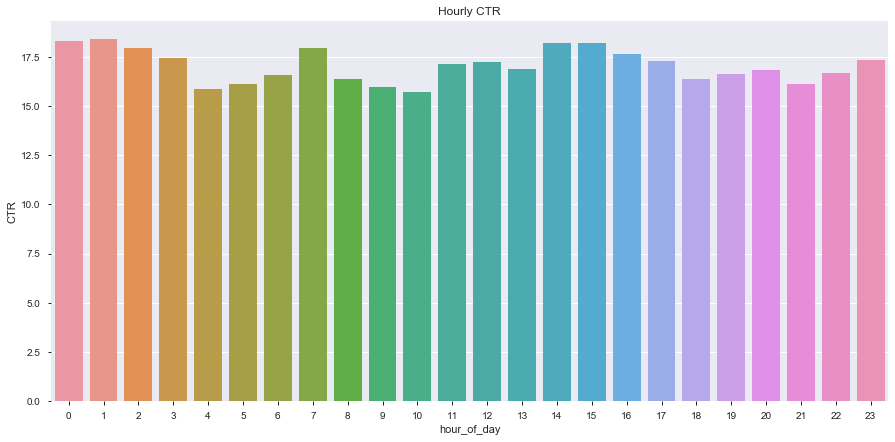

In [19]:
# Set figure size
plt.figure(figsize=(15,7))

# Barplot
sns.barplot(y='CTR',
            x='hour_of_day',
            data=hour_df)

# Set plot features
plt.title('Hourly CTR')
plt.show()

Although it's indicated that clicks were lowest around midnight and highest around noon, an interesting observation here is that the high CTR (> 17%) happened at hours 0, 1, 2, 7, 14, 15, and 16. We should make an effort to figure out why there are discrepancies between the clicks and impressions.

We want to figure out the what are user affinities per hour to better segment and optimize marketing resources.
- Are higher valued users around those higher CTR times? 
- Are we showing Ads inefficiently?
- What's ROI of the current marketing initiative?

### Clicks by Day

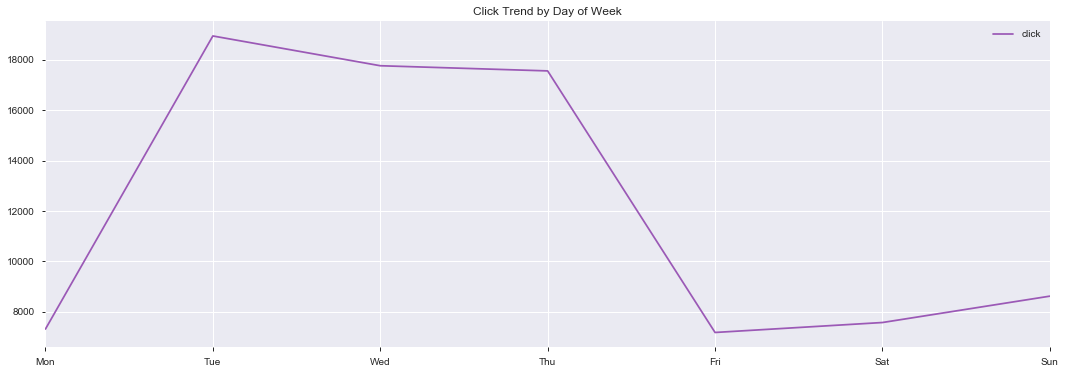

In [20]:
# Get day of week feature
train['day_of_week'] = train['hour'].apply(lambda x: x.weekday_name)

# Names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group
train.groupby('day_of_week').agg({'click': 'sum'}).reindex(day_names).plot(figsize=(18,6))

# Set plot features
ticks = list(range(0, 7 ,1))
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks, labels)
plt.xlabel('')
plt.title('Click Trend by Day of Week')
plt.show()


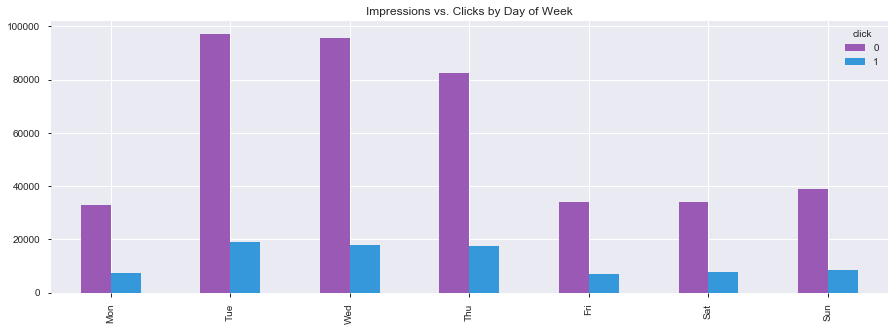

In [21]:
train.groupby(['day_of_week','click']).size().unstack().reindex(day_names).plot(kind='bar', figsize=(15,5))

# Set plot features
ticks = list(range(0, 7 ,1))
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks, labels)
plt.xlabel('')
plt.title('Impressions vs. Clicks by Day of Week')
plt.show()